# 
<center><h1> Homework 2: Auto Differentiation and Data Augmentation</h1></center>
<center> Apoorv Sharma </center>
    <center> DATA 598 (Winter 2022), University of Washington </center>

In [3]:
import torch
import numpy as np

from torchvision.datasets import FashionMNIST
from torch.nn.functional import cross_entropy
import torchvision.transforms as transforms

import pickle

import matplotlib.pyplot as plt 
%matplotlib inline

## 1. Edge cases of automatic differentiation

### 1.1 Derivatives of a discontinuous function

Define and plot a (mathematical) function f : R → R which is discontinuous at $\hat{x}$ with a jump discontinuity. Clearly show the point at which f is discontinuous and indicate whether it is right continuous or left continuous.

This function is *left* continuous


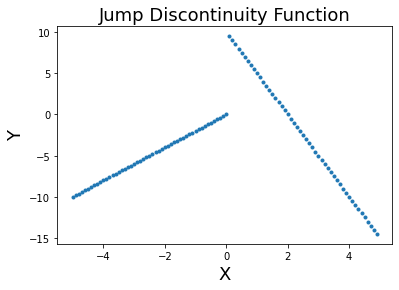

In [4]:
def my_discontinious_fn(x):
    x_hat = 0
    if x <= x_hat:
        return 2*x
    else:
        return -5*x + 10

x_list = np.arange(-5, 5, 0.1)
y_list = [my_discontinious_fn(x) for x in x_list]

f = plt.figure()
ax = f.gca()
ax.plot(x_list, y_list, '.')
ax.set_title('Jump Discontinuity Function', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_xlabel('X', fontsize=18)

print('This function is *left* continuous')

Implement f as a DiffProg function in PyTorch so that PyTorch returns a derivative of 0 at $\hat{x}$, our point
of discontinuity

In [5]:
class MyDiscontiniousFn(torch.autograd.Function): # subclass `torch.autograd.Function`
    
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)  # save the result
        x_hat = 0
        if x <= x_hat:
            return 2*x
        else:
            return -5*x + 10
    
    @staticmethod
    def backward(ctx, z):
        x = ctx.saved_tensors[0]
        x_hat = 0
        if x == x_hat:
            fprime = 0
        elif x > x_hat:
            fprime = -5
        else:
            fprime = 2
        
        return z * fprime

In [6]:
x = torch.rand(1, requires_grad=True)
y = MyDiscontiniousFn.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = -1 * torch.ones(1, requires_grad=True)
y = MyDiscontiniousFn.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = torch.zeros(1, requires_grad=True)
y = MyDiscontiniousFn.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: tensor([7.0149], grad_fn=<MyDiscontiniousFnBackward>), y_prime: tensor([-5.])
y: tensor([-2.], grad_fn=<MyDiscontiniousFnBackward>), y_prime: tensor([2.])
y: tensor([0.], grad_fn=<MyDiscontiniousFnBackward>), y_prime: tensor([0.])


Implement f again in DiffProg so that PyTorch now returns a derivative of −1728 at exactly the same
point $\hat{x}$.

In [7]:
class MyDiscontiniousFn(torch.autograd.Function): # subclass `torch.autograd.Function`
    
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)  # save the result
        x_hat = 0
        if x <= x_hat:
            return 2*x
        else:
            return -5*x + 10
    
    @staticmethod
    def backward(ctx, z):
        x = ctx.saved_tensors[0]
        x_hat = 0
        if x == x_hat:
            fprime = -1728
        elif x > x_hat:
            fprime = -5
        else:
            fprime = 2
        
        return z * fprime

In [8]:
x = torch.rand(1, requires_grad=True)
y = MyDiscontiniousFn.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = -1 * torch.ones(1, requires_grad=True)
y = MyDiscontiniousFn.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = torch.zeros(1, requires_grad=True)
y = MyDiscontiniousFn.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: tensor([6.7683], grad_fn=<MyDiscontiniousFnBackward>), y_prime: tensor([-5.])
y: tensor([-2.], grad_fn=<MyDiscontiniousFnBackward>), y_prime: tensor([2.])
y: tensor([0.], grad_fn=<MyDiscontiniousFnBackward>), y_prime: tensor([-1728.])


### 1.2 Inconsistent derivatives of a differentiable function

Consider the (mathematical) function g(x) = $x^2$. Clearly, g is differentiable everywhere.

Implement g as a DiffProg function in PyTorch so that PyTorch returns a derivative of 0 at $\hat{x} = 0$.

In [9]:
class XPowerTwo(torch.autograd.Function): # subclass `torch.autograd.Function`
    
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)  # save the result
        return x**2
    
    @staticmethod
    def backward(ctx, z):
        x = ctx.saved_tensors[0]
        fprime = 2 * x
        return z * fprime

In [10]:
x = torch.rand(1, requires_grad=True)
y = XPowerTwo.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = -1 * torch.rand(1, requires_grad=True)
y = XPowerTwo.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = torch.zeros(1, requires_grad=True)
y = XPowerTwo.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: tensor([0.3109], grad_fn=<XPowerTwoBackward>), y_prime: tensor([1.1152])
y: tensor([0.0779], grad_fn=<XPowerTwoBackward>), y_prime: tensor([-0.5582])
y: tensor([0.], grad_fn=<XPowerTwoBackward>), y_prime: tensor([0.])


Implement g again in DiffProg so that PyTorch now returns a derivative of 897 at exactly the same point $\hat{x} = 0$.

In [11]:
class XPowerTwo(torch.autograd.Function): # subclass `torch.autograd.Function`
    
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)  # save the result
        return x**2
    
    @staticmethod
    def backward(ctx, z):
        x = ctx.saved_tensors[0]
        if x == 0:
           fprime =  897
        else:
            fprime = 2 * x
        return z * fprime

In [12]:
x = torch.rand(1, requires_grad=True)
y = XPowerTwo.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = -1 * torch.rand(1, requires_grad=True)
y = XPowerTwo.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = torch.zeros(1, requires_grad=True)
y = XPowerTwo.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: tensor([0.3479], grad_fn=<XPowerTwoBackward>), y_prime: tensor([1.1797])
y: tensor([0.3503], grad_fn=<XPowerTwoBackward>), y_prime: tensor([-1.1838])
y: tensor([0.], grad_fn=<XPowerTwoBackward>), y_prime: tensor([897.])


### 1.3 Derivatives with loops: When is it valid?

Write a DiffProg function in PyTorch which takes an input $x_0$ and iteratively updates $x_{t+1}$ ← $\frac{x_t}{2}$ until a stopping criterion |$x_t$| < $10^{-6}$ is satisfied.

In [13]:
class IterativeUpdate(torch.autograd.Function): # subclass `torch.autograd.Function`
    
    @staticmethod
    def forward(ctx, x):
        n = torch.zeros(1, requires_grad=False)
        while abs(x) >= 10e-6:
            x = x/2
            n[0] += 1
        
        ctx.save_for_backward(n)  # save the result
        return x
        
    @staticmethod
    def backward(ctx, z):
        n = ctx.saved_tensors[0]
        fprime = 0.5 ** n
        return z * fprime    

Plot this function in the range [−1, 1]. Are the derivatives of this function well-defined everywhere?

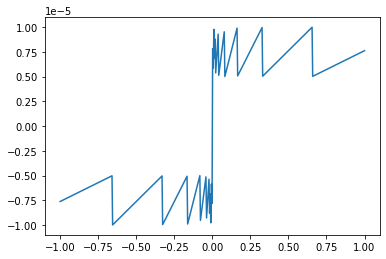

In [14]:
x_list = np.linspace(-1, 1, 500)
y_list = [IterativeUpdate.apply(x) for x in x_list]
plt.plot(x_list, y_list, '-')

In [15]:
x = torch.rand(1, requires_grad=True)
y = IterativeUpdate.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = -1 * torch.rand(1, requires_grad=True)
y = IterativeUpdate.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = torch.zeros(1, requires_grad=True)
y = IterativeUpdate.apply(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: tensor([9.8362e-06], grad_fn=<IterativeUpdateBackward>), y_prime: tensor([1.5259e-05])
y: tensor([-8.6255e-06], grad_fn=<IterativeUpdateBackward>), y_prime: tensor([0.0002])
y: tensor([0.], grad_fn=<IterativeUpdateBackward>), y_prime: tensor([1.])


Find a point $\hat{x}$ such that implementing the stopping criterion as |$x_t$| < $10^{−6}$ or |$x_t$| ≤ $10^{−6}$ changes the value of the derivative returned by PyTorch. Is the derivative mathematically well-defined at $\hat{x}$.

In [16]:
def stopping_criterion_greater_or_equal(x):
    while abs(x) >= 10e-6:
        x = x/2
    return x

def stopping_criterion_greater(x):
    while abs(x) > 10e-6:
        x = x/2
    return x
        
n = 3
x = 10e-6 * 2 ** n * torch.ones(1, requires_grad=True)
y_greater_or_equal = stopping_criterion_greater_or_equal(x)
y_greater = stopping_criterion_greater(x)
y_prime_greater_or_equal = torch.autograd.grad(outputs=y_greater_or_equal, inputs=[x])[0]
y_prime_greater = torch.autograd.grad(outputs=y_greater, inputs=[x])[0]

print(f'x: {x}, y_prime_greater_or_equal: {y_prime_greater_or_equal}')
print(f'x: {x}, y_prime_greater: {y_prime_greater}')

x: tensor([8.0000e-05], grad_fn=<MulBackward0>), y_prime_greater_or_equal: tensor([0.0625])
x: tensor([8.0000e-05], grad_fn=<MulBackward0>), y_prime_greater: tensor([0.1250])


Write out the (mathematical) function ψ : R → R which is implemented by this DiffProg function.

Let $x_0$ be the initial starting value and $x_t$ be the value after the $t$th iteration. We define the function above as follows:

$$
    x_t = 
\begin{cases}
    \mid x_t\mid,& \text{if } \mid x_t \mid \leq 10^{-6}\\
    \frac{x_t}{2},              & \text{otherwise}
\end{cases}
$$

### 1.4 When can we not use branches in differentiable programs?

Plot this function. Is it continuous? Is it differentiable almost everywhere?

In [17]:
def my_binary_function(x):
    if x >= 0:
        return 1
    
    return 0

Implement this in PyTorch. Try to compute its derivatives. What do we get?

This code has been commented out on purpose. We get an error when this code is run

In [18]:
# x = torch.rand(1, requires_grad=True)
# y = my_binary_function(x)
# y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
# print(f'y: {y}, y_prime: {y_prime}')

# x = -1 * torch.rand(1, requires_grad=True)
# y = my_binary_function(x)
# y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
# print(f'y: {y}, y_prime: {y_prime}')

# x = torch.zeros(1, requires_grad=True)
# y = my_binary_function(x)
# y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
# print(f'y: {y}, y_prime: {y_prime}')

Can we train a differentiable program containing this function as a component using stochastic gradient descent? Why or why not? Justify your answer in words

No, we cannot train a differentiable program containing this function as a component using SGD. The main reason is because SGD computes the gradient so it can move in the direction with the steepest descent. 

However, this function always returns a derivative of 0. As a result, the algorithm will fail to converge and move. Consequently, no learning will occur

## 2.  Data Augmentation

Data augmentation can be applied at training time or testing time.

* Training time: in each iteration, we sample a minibatch, take one transformation per-image and use those instead to compute the minibatch stochastic gradient. The rest of the training loop continues as usual. 
* Test time: we predict an output for an image x as follows. Take augmentations x1, x2, · · · , xT of x. For each augmented image xi, obtain prediction yi. The combined prediction y for image x is obtained by taking a majority vote from y1, ... , yT. Note that the augmentations can only be used to compute the accuracy but not the loss.

In this exercise, we will try four combinations:
1. No data augmentation for training or testing
2. Use data augmentation for training but not for testing
3. Use data augmentation for testing but not for training
4. Use data augmentation for both training and testing

Here are the details:
* The setup is identical to the lab. Take the FashionMNIST dataset and randomly subsample 10% of its training set to work with. As a test set, we will use the full test set of FashionMNIST.
* We will use a convolutional neural network defined in the lab.
* Use a batch size of 16 and a learning rate of 0.04.
* Train the model for 100 passes through the data or until you observe perfect interpolation of the training data (i.e., the training accuracy is 100%).
* We will use a random crop and a random rotation as our transformations.
* For testing time, use T = 8 augmentations for each image.

The deliverables are:
1. Report the final test accuracy for each of the 4 settings considered above.
2. Make 4 plots, one each for the train loss, train accuracy, test loss and test accuracy over the course of training (i.e., the metric on the y-axis and number of effective passes on the x-axis). Plot all 4 lines on the same plot.

Hint: You may use the function `transform_selected_data` defined in this week’s demo to perform the data
augmentations.

X_train.shape = torch.Size([6000, 28, 28])
n_train: 6000, n_test: 10000
Image size: torch.Size([28, 28])


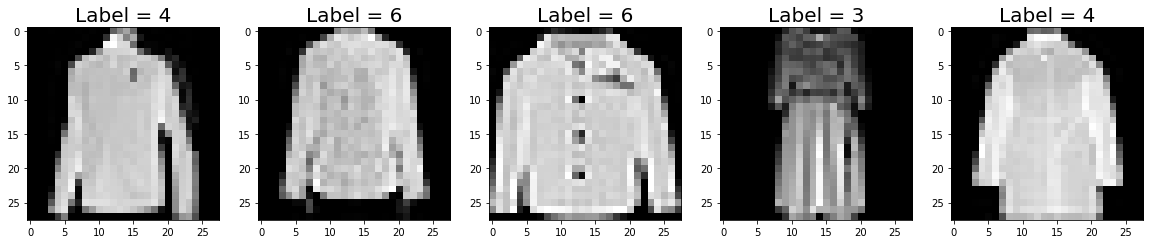

In [19]:
# download dataset (~117M in size)
train_dataset = FashionMNIST('./data', train=True, download=True)
X_train = train_dataset.data # torch tensor of type uint8
y_train = train_dataset.targets # torch tensor of type Long
test_dataset = FashionMNIST('./data', train=False, download=True)
X_test = test_dataset.data
y_test = test_dataset.targets

# choose a subsample of 10% of the data:
idxs_train = torch.from_numpy(
    np.random.choice(X_train.shape[0], replace=False, size=X_train.shape[0]//10)).long()
X_train, y_train = X_train[idxs_train], y_train[idxs_train]

print(f'X_train.shape = {X_train.shape}')
print(f'n_train: {X_train.shape[0]}, n_test: {X_test.shape[0]}')
print(f'Image size: {X_train.shape[1:]}')

f, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, idx in enumerate(np.random.choice(X_train.shape[0], 5)):
    ax[i].imshow(X_train[idx], cmap='gray', vmin=0, vmax=255)
    ax[i].set_title(f'Label = {y_train[idx]}', fontsize=20)
    
# Normalize dataset: pixel values lie between 0 and 255
# Normalize them so the pixelwise mean is zero and standard deviation is 1

X_train = X_train.float()  # convert to float32
X_train = X_train.view(-1, 784)
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mean[None, :]) / (std[None, :] + 1e-6)  # avoid divide by zero

X_test = X_test.float()
X_test = X_test.view(-1, 784)
X_test = (X_test - mean[None, :]) / (std[None, :] + 1e-6)

n_class = np.unique(y_train).shape[0]

In [20]:
def transform_selected_data(X):
    # X is of shape (B, 784), where B is the batch_size
    X = X.view(-1, 28, 28)  # reshape to 28x28
    transform1 = transforms.RandomResizedCrop((28, 28), scale=(0.75, 1.0), ratio=(0.75, 1.33), interpolation=2)
    transform2 = transforms.RandomRotation((-10, 10))
    X_transformed = transform2(transform1(X))
    return X_transformed.view(-1, 784) # reshape into a vector

In [21]:
def compute_objective(net, X, y):
    """ Compute the multinomial logistic loss. 
        net is a module
        X of shape (n, d) and y of shape (n,)
    """
    # send 
    score = net(X)
    # PyTorch's function cross_entropy computes the multinomial logistic loss
    return cross_entropy(input=score, target=y, reduction='mean') 

@torch.no_grad()
def compute_accuracy(net, X, y, num_augmentations=0, augment_data=False):
    """ Compute the classification accuracy
        ws is a list of tensors of consistent shapes 
        X of shape (n, d) and y of shape (n,)
    """ 
    if augment_data:
        aug_predictions = torch.empty(num_augmentations, X.shape[0])
        for i in range(num_augmentations):
            score = net(transform_selected_data(X)) #get prob for current aug
            curr_aug_predictions = torch.argmax(score, axis=1).reshape(1,-1)  #class with highest score is predicted
            aug_predictions[i] = curr_aug_predictions #assign the curr aug prediction to each row

        predictions = torch.mode(aug_predictions, 0).values #take the column-wise mode 

    else:
        score = net(X)
        predictions = torch.argmax(score, axis=1)  # class with highest score is predicted
    
    return (predictions == y).sum() * 1.0 / y.shape[0]

@torch.no_grad()
def compute_logs(net, verbose=False, num_augmentations=0, augment_data=False):
    train_loss = compute_objective(net, X_train, y_train)
    test_loss = compute_objective(net, X_test, y_test)
    train_accuracy = compute_accuracy(net, X_train, y_train, num_augmentations, augment_data)
    test_accuracy = compute_accuracy(net, X_test, y_test, num_augmentations, augment_data)
    if verbose:
        print(('Train Loss = {:.3f}, Train Accuracy = {:.3f}, ' + 
               'Test Loss = {:.3f}, Test Accuracy = {:.3f}').format(
                train_loss.item(), train_accuracy.item(), 
                test_loss.item(), test_accuracy.item())
    )
    return (train_loss, train_accuracy, test_loss, test_accuracy)

def minibatch_sgd_one_pass(net, X, y, learning_rate, batch_size, verbose=False, num_augmentations=0, augment_data=False):
    num_examples = X.shape[0]
    average_loss = 0.0
    num_updates = int(round(num_examples / batch_size))
    for i in range(num_updates):
        idxs = np.random.choice(num_examples, size=(batch_size,))
        X_data = X[idxs]
        
        if augment_data:
            X_data = transform_selected_data(X_data)

        # compute the objective. 
        objective = compute_objective(net, X_data, y[idxs]) 
        average_loss = 0.99 * average_loss + 0.01 * objective.item()
        if verbose and (i+1) % 100 == 0:
            print(average_loss)
        
        gradients = torch.autograd.grad(outputs=objective, inputs=net.parameters())
        
        with torch.no_grad():
            for (w, g) in zip(net.parameters(), gradients):
                w -= learning_rate * g
    return net

In [22]:
class MyConvNet(torch.nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv_ensemble_1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=5, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2))
        self.conv_ensemble_2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=5, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2))
        self.fully_connected_layer = torch.nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # reshape input; convolutions need a channel
        out = self.conv_ensemble_1(x)  # first convolution + relu + pooling
        out = self.conv_ensemble_2(out) # second convolution + relu + pooling
        out = out.view(out.shape[0], -1)  # flatten output
        out = self.fully_connected_layer(out)  # output layer
        return out

In [23]:
learning_rate = 0.04
num_augmentations = 8
verbose = False
cases_list = []
batch_size = 16

aug_data_rules = [(False, False), (True, False), (False, True), (True, True)]
for i, aug_data in enumerate(aug_data_rules):
    augment_train, augment_test = aug_data
    logs = []
    
    print(f'Starting Case {i+1} with Augment Train={augment_train} and Augment Test={augment_test}')

    model = MyConvNet(num_classes=10)
    print('Iteration 0', end=', ')
    logs.append(compute_logs(model, True, num_augmentations, augment_test))

    # Compute 100 iterations OR until complete interpolation
    for j in range(100):
        model = minibatch_sgd_one_pass(model, X_train, y_train, learning_rate, batch_size, verbose, num_augmentations, augment_train)
        print(f'Iteration {j+1}', end=', ')
        log = compute_logs(model, True, num_augmentations, augment_test)
        logs.append(log)
        if log[1].item() == 1: #check if complete interpolation has been reached
            break
    
    torch.save(model.state_dict(), f'./models/model_parms_case_{i+1}.pt')
        
    cases_list.append(logs)
    print('\n')

with open('./models/logs.pkl', 'wb') as f:
    pickle.dump(cases_list, f)

Starting Case 1 with Augment Train=False and Augment Test=False
Iteration 0, Train Loss = 2.317, Train Accuracy = 0.110, Test Loss = 2.316, Test Accuracy = 0.120
Iteration 1, Train Loss = 0.467, Train Accuracy = 0.827, Test Loss = 0.530, Test Accuracy = 0.807
Iteration 2, Train Loss = 0.370, Train Accuracy = 0.873, Test Loss = 0.462, Test Accuracy = 0.841
Iteration 3, Train Loss = 0.343, Train Accuracy = 0.880, Test Loss = 0.458, Test Accuracy = 0.844
Iteration 4, Train Loss = 0.322, Train Accuracy = 0.881, Test Loss = 0.464, Test Accuracy = 0.837
Iteration 5, Train Loss = 0.280, Train Accuracy = 0.897, Test Loss = 0.455, Test Accuracy = 0.846
Iteration 6, Train Loss = 0.232, Train Accuracy = 0.912, Test Loss = 0.420, Test Accuracy = 0.861
Iteration 7, Train Loss = 0.210, Train Accuracy = 0.923, Test Loss = 0.415, Test Accuracy = 0.864
Iteration 8, Train Loss = 0.198, Train Accuracy = 0.930, Test Loss = 0.440, Test Accuracy = 0.860
Iteration 9, Train Loss = 0.173, Train Accuracy = 0.94

/home/apoorvsharma/anaconda3/envs/data598/lib/python3.8/site-packages/torchvision/transforms/transforms.py:852: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


Iteration 1, Train Loss = 0.562, Train Accuracy = 0.790, Test Loss = 0.628, Test Accuracy = 0.772
Iteration 2, Train Loss = 0.493, Train Accuracy = 0.821, Test Loss = 0.571, Test Accuracy = 0.791
Iteration 3, Train Loss = 0.427, Train Accuracy = 0.844, Test Loss = 0.506, Test Accuracy = 0.819
Iteration 4, Train Loss = 0.404, Train Accuracy = 0.854, Test Loss = 0.494, Test Accuracy = 0.831
Iteration 5, Train Loss = 0.430, Train Accuracy = 0.840, Test Loss = 0.528, Test Accuracy = 0.815
Iteration 6, Train Loss = 0.372, Train Accuracy = 0.869, Test Loss = 0.449, Test Accuracy = 0.841
Iteration 7, Train Loss = 0.374, Train Accuracy = 0.867, Test Loss = 0.483, Test Accuracy = 0.839
Iteration 8, Train Loss = 0.354, Train Accuracy = 0.867, Test Loss = 0.458, Test Accuracy = 0.833
Iteration 9, Train Loss = 0.334, Train Accuracy = 0.878, Test Loss = 0.428, Test Accuracy = 0.848
Iteration 10, Train Loss = 0.316, Train Accuracy = 0.882, Test Loss = 0.425, Test Accuracy = 0.845
Iteration 11, Train

Iteration 84, Train Loss = 0.153, Train Accuracy = 0.944, Test Loss = 0.480, Test Accuracy = 0.870
Iteration 85, Train Loss = 0.141, Train Accuracy = 0.948, Test Loss = 0.429, Test Accuracy = 0.872
Iteration 86, Train Loss = 0.134, Train Accuracy = 0.951, Test Loss = 0.457, Test Accuracy = 0.875
Iteration 87, Train Loss = 0.155, Train Accuracy = 0.943, Test Loss = 0.517, Test Accuracy = 0.869
Iteration 88, Train Loss = 0.145, Train Accuracy = 0.948, Test Loss = 0.481, Test Accuracy = 0.866
Iteration 89, Train Loss = 0.149, Train Accuracy = 0.950, Test Loss = 0.470, Test Accuracy = 0.868
Iteration 90, Train Loss = 0.162, Train Accuracy = 0.940, Test Loss = 0.489, Test Accuracy = 0.863
Iteration 91, Train Loss = 0.157, Train Accuracy = 0.942, Test Loss = 0.513, Test Accuracy = 0.864
Iteration 92, Train Loss = 0.145, Train Accuracy = 0.946, Test Loss = 0.442, Test Accuracy = 0.874
Iteration 93, Train Loss = 0.157, Train Accuracy = 0.939, Test Loss = 0.466, Test Accuracy = 0.863
Iteration 

Iteration 66, Train Loss = 0.000, Train Accuracy = 0.905, Test Loss = 0.926, Test Accuracy = 0.851
Iteration 67, Train Loss = 0.000, Train Accuracy = 0.887, Test Loss = 0.929, Test Accuracy = 0.815
Iteration 68, Train Loss = 0.000, Train Accuracy = 0.877, Test Loss = 0.931, Test Accuracy = 0.839
Iteration 69, Train Loss = 0.000, Train Accuracy = 0.917, Test Loss = 0.932, Test Accuracy = 0.838
Iteration 70, Train Loss = 0.000, Train Accuracy = 0.870, Test Loss = 0.935, Test Accuracy = 0.833
Iteration 71, Train Loss = 0.000, Train Accuracy = 0.885, Test Loss = 0.939, Test Accuracy = 0.827
Iteration 72, Train Loss = 0.000, Train Accuracy = 0.887, Test Loss = 0.939, Test Accuracy = 0.838
Iteration 73, Train Loss = 0.000, Train Accuracy = 0.898, Test Loss = 0.942, Test Accuracy = 0.822
Iteration 74, Train Loss = 0.000, Train Accuracy = 0.886, Test Loss = 0.943, Test Accuracy = 0.828
Iteration 75, Train Loss = 0.000, Train Accuracy = 0.887, Test Loss = 0.948, Test Accuracy = 0.848
Iteration 

Iteration 48, Train Loss = 0.197, Train Accuracy = 0.916, Test Loss = 0.472, Test Accuracy = 0.857
Iteration 49, Train Loss = 0.198, Train Accuracy = 0.925, Test Loss = 0.444, Test Accuracy = 0.864
Iteration 50, Train Loss = 0.166, Train Accuracy = 0.921, Test Loss = 0.434, Test Accuracy = 0.878
Iteration 51, Train Loss = 0.186, Train Accuracy = 0.923, Test Loss = 0.451, Test Accuracy = 0.867
Iteration 52, Train Loss = 0.193, Train Accuracy = 0.924, Test Loss = 0.447, Test Accuracy = 0.860
Iteration 53, Train Loss = 0.175, Train Accuracy = 0.920, Test Loss = 0.437, Test Accuracy = 0.874
Iteration 54, Train Loss = 0.197, Train Accuracy = 0.926, Test Loss = 0.449, Test Accuracy = 0.861
Iteration 55, Train Loss = 0.195, Train Accuracy = 0.923, Test Loss = 0.429, Test Accuracy = 0.871
Iteration 56, Train Loss = 0.175, Train Accuracy = 0.937, Test Loss = 0.451, Test Accuracy = 0.869
Iteration 57, Train Loss = 0.180, Train Accuracy = 0.915, Test Loss = 0.440, Test Accuracy = 0.863
Iteration 

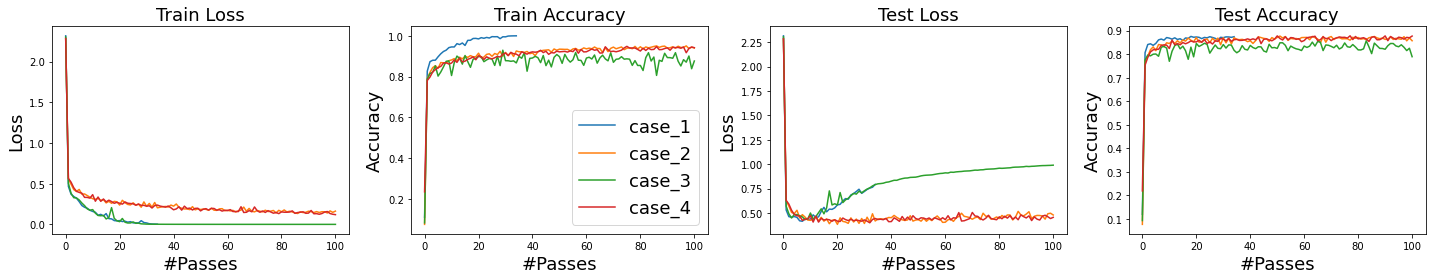

In [24]:
f, ax = plt.subplots(1, 4, figsize=(20, 4))

ax[0].set_title('Train Loss', fontsize=18)
ax[1].set_title('Train Accuracy', fontsize=18)
ax[2].set_title('Test Loss', fontsize=18)
ax[3].set_title('Test Accuracy', fontsize=18)

for j, case in enumerate(cases_list):
    line_label = f'case_{j+1}'
    for i in range(4):
        ax[i].set_xlabel('#Passes', fontsize=18)
        ax[i].set_ylabel('Loss' if i%2==0 else 'Accuracy', fontsize=18)
        ax[i].plot(list(map(lambda x: x[i], case)), label=line_label)
        
ax[1].legend(fontsize=18)
plt.tight_layout()

In [30]:
for j, case in enumerate(cases_list):
    print(f'The final test accuracy for case {j+1} is: {case[-1][-1].item()*100:.2f}%')

The final test accuracy for case 1 is: 87.41%
The final test accuracy for case 2 is: 85.70%
The final test accuracy for case 3 is: 78.93%
The final test accuracy for case 4 is: 87.69%
